
Date/Time (for 10 minutes intervals)

**ActivePower (kW)**: The power generated by the turbine for that moment

**Wind Speed (m/s)**: The wind speed at the hub height of the turbine (the wind speed that turbine use for electricity generation)

**TheoreticalPowerCurve (KWh)**: The theoretical power values that the turbine generates with that wind speed which is given by the turbine manufacturer

**Wind Direction (°)**: The wind direction at the hub height of the turbine (wind turbines turn to this direction automaticly)

### Importing Libraries

In [1]:
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy.random import rand
import random
from random import randrange
import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
%matplotlib inline

### Importing Dataset

In [3]:
data=pd.read_csv('dataset\Wind_power_data.csv')
data

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913


## **PART-1 DATA PREPROCESSING**
**Understand the types/nature of the variables in data set**: Numerical, 
categorical and Mixed. Undertanding the nature of the variables will help us decide what feature engineering technique we want to carry on.

**Missing data**

**Descriptive Analysis of Data**

**Time Series Analysis**

**Wind Power Curve Analysis**

### 1. Understand the types/nature of the variables in data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50530 entries, 0 to 50529
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date/Time                      50530 non-null  object 
 1   LV ActivePower (kW)            50530 non-null  float64
 2   Wind Speed (m/s)               50530 non-null  float64
 3   Theoretical_Power_Curve (KWh)  50530 non-null  float64
 4   Wind Direction (°)             50530 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.9+ MB


In [5]:
# renaming the column names of the data
data.columns=['date','active_power','wind_speed','power_curve','wind_dir']
data.head()

,date,active_power,wind_speed,power_curve,wind_dir
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


### 2. Missing Values

In [6]:
data.isnull().sum()

date            0
active_power    0
wind_speed      0
power_curve     0
wind_dir        0
dtype: int64

There is no missing values.

### 3. Descriptive Analysis of Data

In [7]:
data.describe()

,active_power,wind_speed,power_curve,wind_dir
count,50530.000000,50530.000000,50530.000000,50530.000000
mean,1307.684332,7.557952,1492.175463,123.687559
std,1312.459242,4.227166,1368.018238,93.443736
min,-2.471405,0.000000,0.000000,0.000000
25%,50.677890,4.201395,161.328167,49.315437
50%,825.838074,7.104594,1063.776283,73.712978
75%,2482.507568,10.300020,2964.972462,201.696720
max,3618.732910,25.206011,3600.000000,359.997589


In [8]:
# convert date to datetime format 

data['date']=pd.to_datetime(data['date'])

# setting date as index
data.set_index('date', inplace=True)

data

,active_power,wind_speed,power_curve,wind_dir
date,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500


# **Time Series Analysis**

## Hourly Analysis

<AxesSubplot:xlabel='date', ylabel='Active Power (kWh)'>

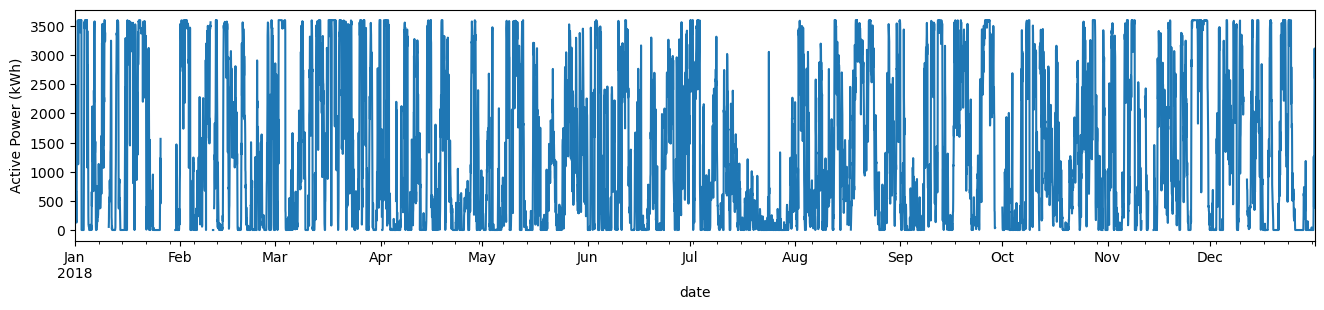

In [9]:
# plotting hourly average power
data.resample('H').mean().active_power.plot(figsize=(16,3),ylabel='Active Power (kWh)')

Plotting this way leads to misinterpretation that the power is produced uniformly throughout year.

In [10]:
dates=data.index
hours=[date.hour for date in dates]
data['hour']=hours

data

,active_power,wind_speed,power_curve,wind_dir,hour
date,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0
...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23


<AxesSubplot:xlabel='hour'>

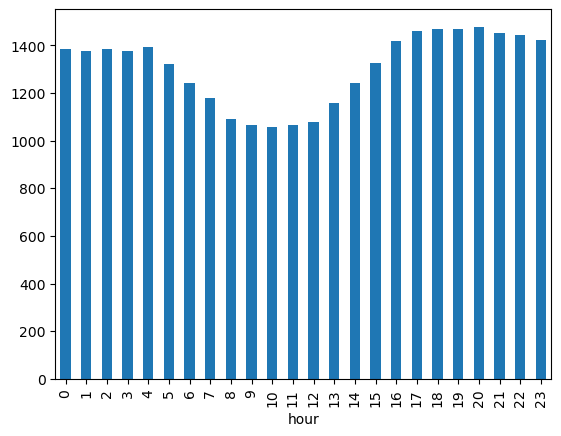

In [11]:
data.groupby('hour').mean().active_power.plot(kind='bar')

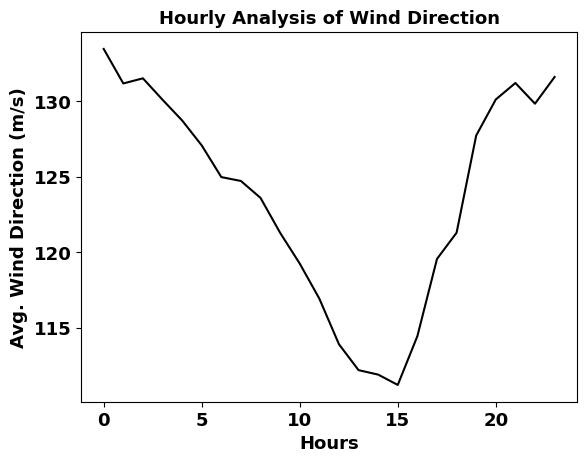

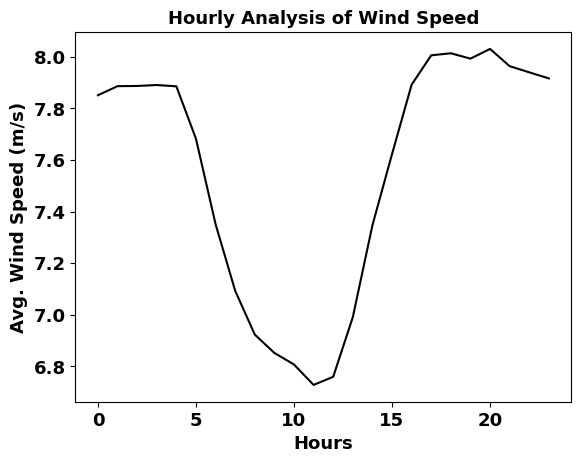

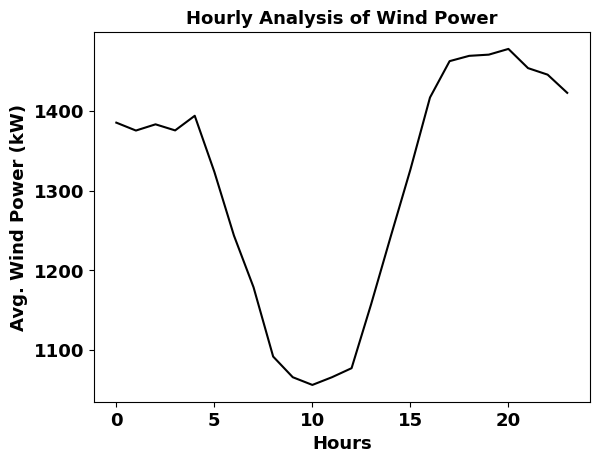

In [12]:
data.groupby('hour').wind_dir.mean().plot(color='black')
plt.title('Hourly Analysis of Wind Direction',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('Avg. Wind Direction (m/s)', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

data.groupby('hour').wind_speed.mean().plot(color='black')
plt.title('Hourly Analysis of Wind Speed',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('Avg. Wind Speed (m/s)', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

data.groupby('hour').active_power.mean().plot(color='black')
plt.title('Hourly Analysis of Wind Power',fontsize = 13, fontweight='bold')
plt.xlabel('Hours',fontsize = 13, fontweight='bold')
plt.ylabel('Avg. Wind Power (kW)', fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()



In [13]:
dates=data.index
month=[date.month for date in dates ]
data['month']=month

data

,active_power,wind_speed,power_curve,wind_dir,hour,month
date,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1
...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12


## Monthly Analysis

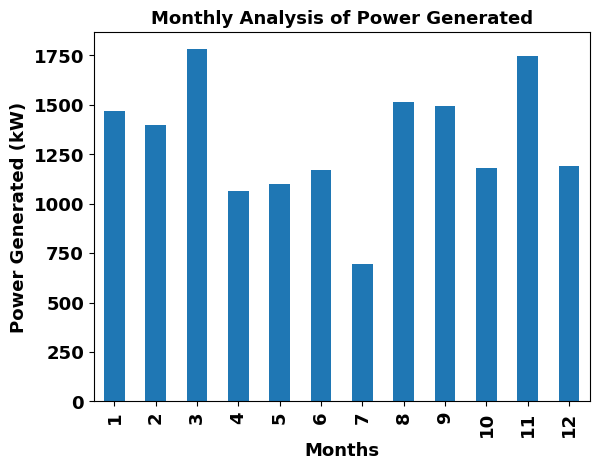

In [14]:
data.groupby(month).active_power.mean().plot(kind='bar')
plt.title('Monthly Analysis of Power Generated',fontsize = 13, fontweight='bold')
plt.xlabel('Months',fontsize = 13, fontweight='bold')
plt.ylabel('Power Generated (kW)',fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

Highest Power is produced during March and November month and lowest during July

Loss

In [15]:
data['loss']=data['power_curve']-data['active_power']


(array([17532, 17563, 17591, 17622, 17652, 17683, 17713, 17744, 17775,
        17805, 17836, 17866, 17896], dtype=int64),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

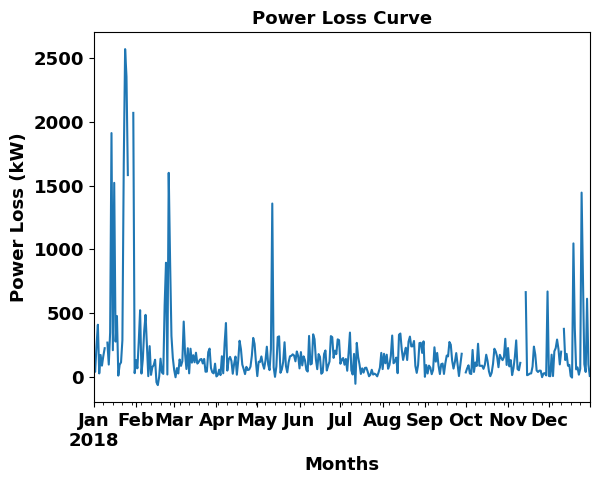

In [16]:
data.resample('D').mean().loss.plot()
plt.title('Power Loss Curve',fontsize = 13, fontweight='bold')
plt.xlabel('Months',fontsize = 13, fontweight='bold')
plt.ylabel('Power Loss (kW)',fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')

There is severe loss during few days of January, and also during starting of March and ending of December

## **Wind Power Curve Analysis**

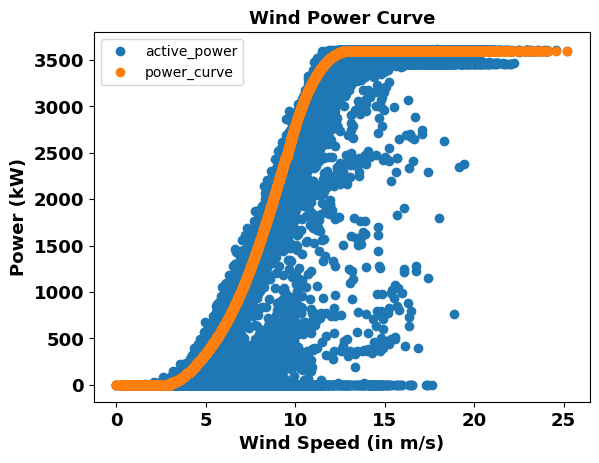

In [17]:
ax=data.plot(x='wind_speed',y=['active_power','power_curve'], style='o')
plt.xlabel('Wind Speed (in m/s)',fontsize = 13, fontweight='bold')
plt.ylabel('Power (kW)',fontsize = 13, fontweight='bold')
plt.title('Wind Power Curve',fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

For better interpretation of data we will bin the wind speed feature.

In [18]:
interval=np.arange(0.25,26,0.5)
data.groupby(pd.cut(data['wind_speed'],interval)).mean()

,active_power,wind_speed,power_curve,wind_dir,hour,month,loss
wind_speed,,,,,,,
"(0.25, 0.75]",0.000000,0.576992,0.000000,165.932577,11.127820,6.917293,0.000000
"(0.75, 1.25]",0.000505,1.017500,0.000000,177.411613,11.295671,7.026399,-0.000505
"(1.25, 1.75]",0.004856,1.513483,0.000000,174.603221,10.741866,6.890094,-0.004856
"(1.75, 2.25]",0.049437,2.009288,0.000000,170.506608,10.909741,6.815080,-0.049437
"(2.25, 2.75]",0.492883,2.508442,0.000000,161.085363,11.185185,6.690108,-0.492883
"(2.75, 3.25]",4.720572,3.004436,11.182960,153.013080,10.738693,6.503426,6.462388
"(3.25, 3.75]",25.595717,3.495974,53.255856,142.912788,11.095670,6.480866,27.660139
"(3.75, 4.25]",86.081460,4.006528,127.311184,136.855815,11.398386,6.618759,41.229725
"(4.25, 4.75]",167.611188,4.496874,221.949518,128.407628,11.831386,6.674962,54.338330


Text(0, 0.5, 'power')

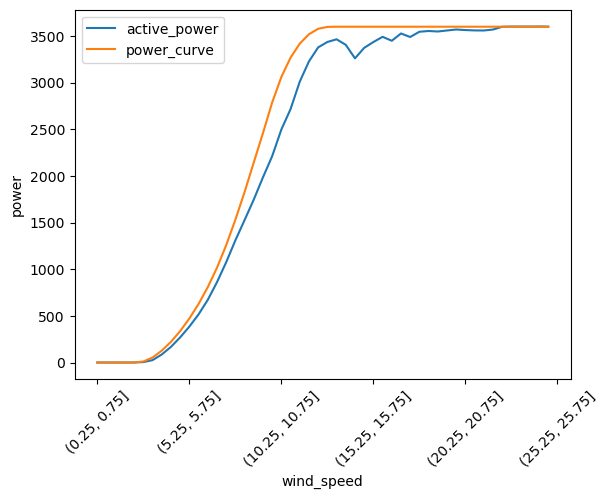

In [19]:
interval=np.arange(0.25,26,0.5)
data.groupby(pd.cut(data['wind_speed'],interval)).mean().plot(y=['active_power','power_curve'],rot=45)
plt.ylabel('power')

 A better look plot. This will display the mean value 0.5, 1, 1.5, etc., instead of the bins

In [20]:
def mean_power_curve(data):
  interval=np.arange(0.25,26,0.5)
  groups=data.groupby(pd.cut(data['wind_speed'],interval))
  mean_speed=[]

  for key,group in groups:
    c = np.str(key)
    string = c[1:-1]
    string=string.split(',')
    bound=[float(i) for i in string]
    mean=np.mean(bound)
    mean_speed.append(mean)

  data_mean_speed=groups.mean()
  data_mean_speed['mean_speed'] = mean_speed

  data_mean_speed.plot(x='mean_speed',y=['active_power', 'power_curve'],style='.-')


c:\Users\pandy\Anaconda 3\envs\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


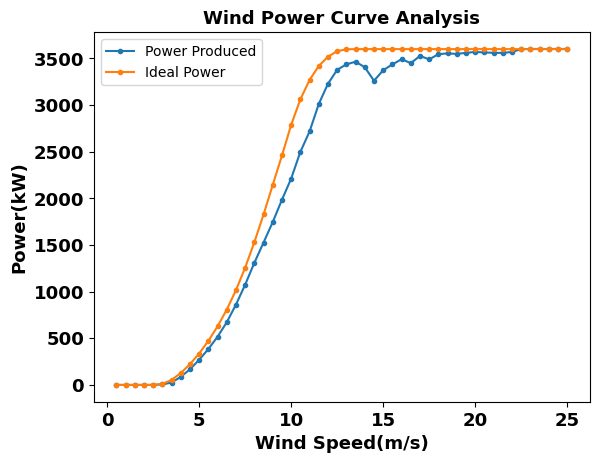

In [21]:
mean_power_curve(data)
plt.title('Wind Power Curve Analysis',fontsize = 13, fontweight='bold')
plt.xlabel('Wind Speed(m/s)',fontsize = 13, fontweight='bold')
plt.ylabel('Power(kW)',fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.legend(['Power Produced', 'Ideal Power'])
plt.show()

This wind power plant do not produce the rated power as suggested by power plant manufacturer.This difference is called as Loss

Moreover, the power plant is not producing any power for 3.5m/s wind speed. Therefore, it can be considered as Thershold

# **Directivity analysis**

In [22]:
# we need to analysis power from every direction
def direction(x):
    if x > 348.75 or x<11.25: return 'N'
    if x < 33.75: return 'NNE'
    if x < 56.25: return 'NE'
    if x < 78.75: return 'ENE'
    if x < 101.25: return 'E'
    if x < 123.75: return 'ESE'
    if x < 146.25: return 'SE'
    if x < 168.75: return 'SSE'
    if x < 191.25: return 'S'
    if x < 213.75: return 'SSW'
    if x < 236.25: return 'SW'
    if x < 258.75: return 'WSW'
    if x < 281.25: return 'W'
    if x < 303.75: return 'WNW'
    if x < 326.25: return 'NW'
    else: return 'NNW'

In [23]:


data['direction']=data['wind_dir'].apply(direction)
data

,active_power,wind_speed,power_curve,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12,433.209835,E
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12,-511.297256,E
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12,-412.822178,E


In [24]:
data['direction'].unique()

array(['W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'N', 'ESE', 'E', 'ENE',
       'NE', 'NNE', 'NW', 'NNW', 'WNW'], dtype=object)

c:\Users\pandy\Anaconda 3\envs\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


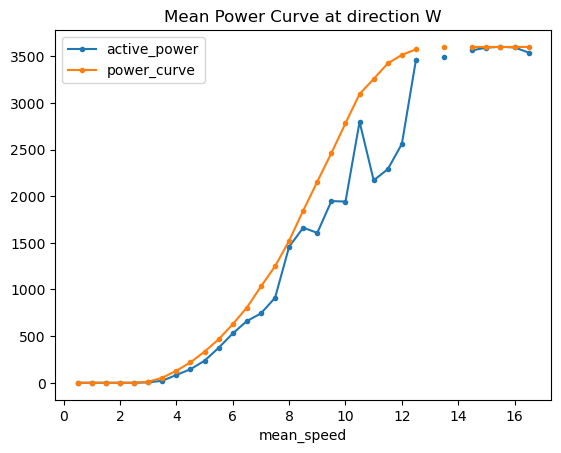

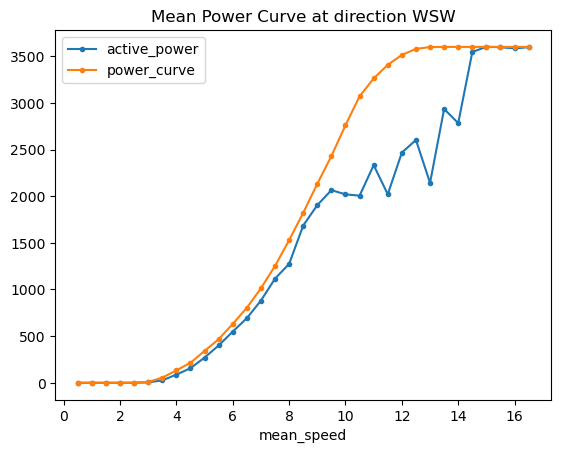

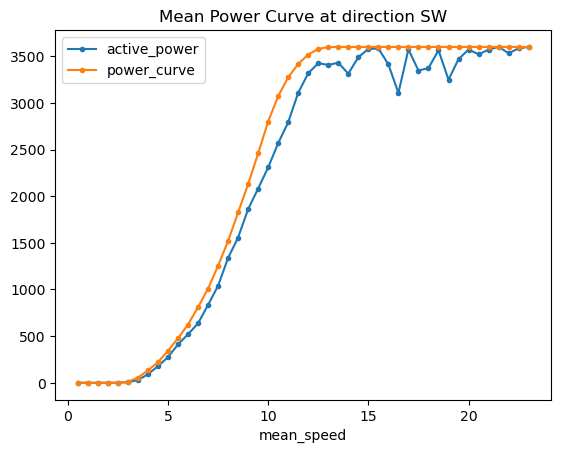

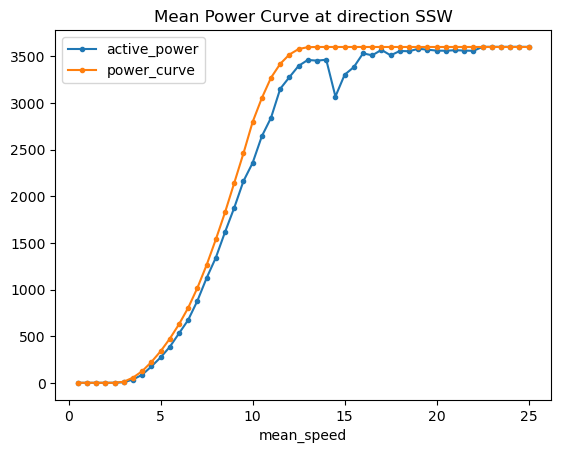

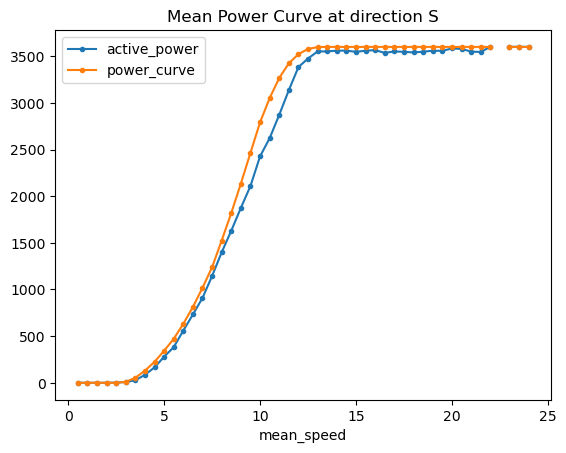

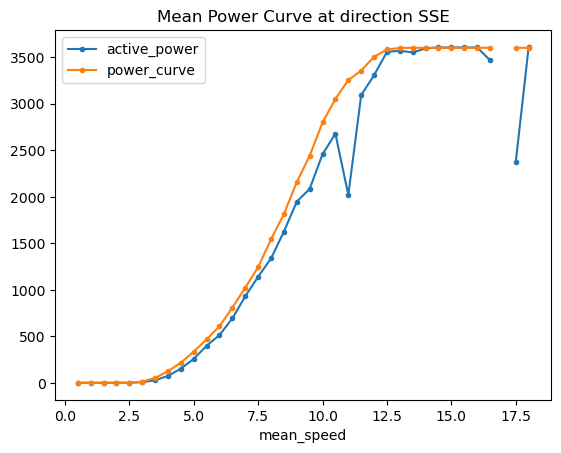

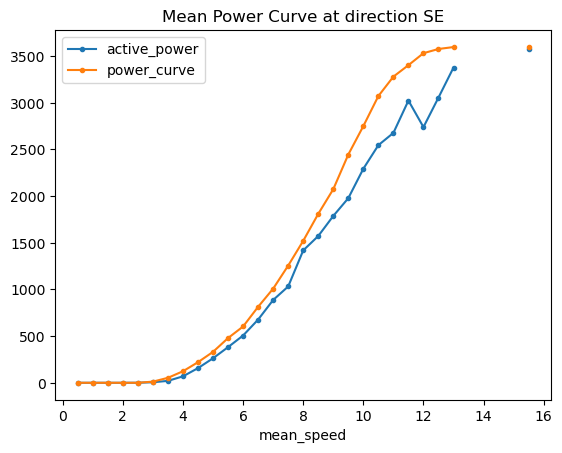

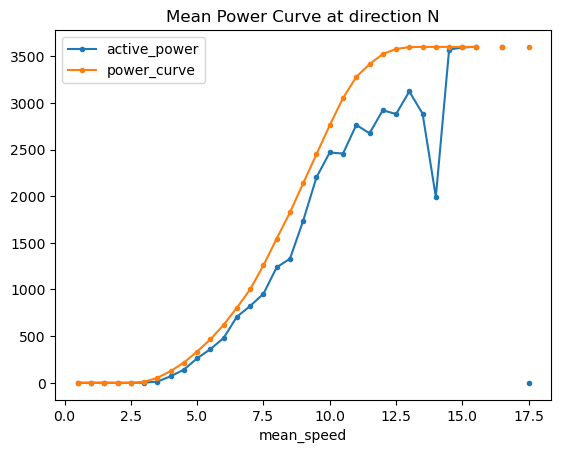

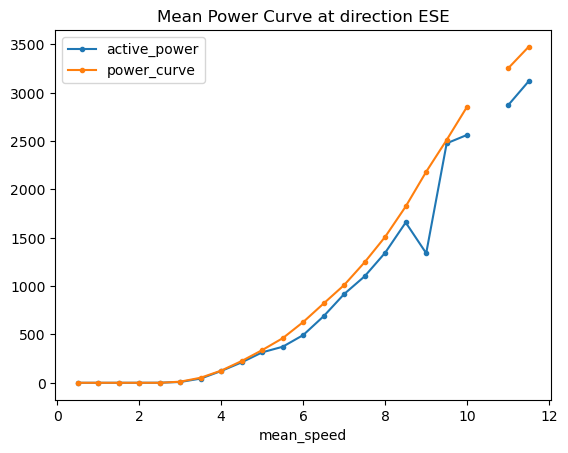

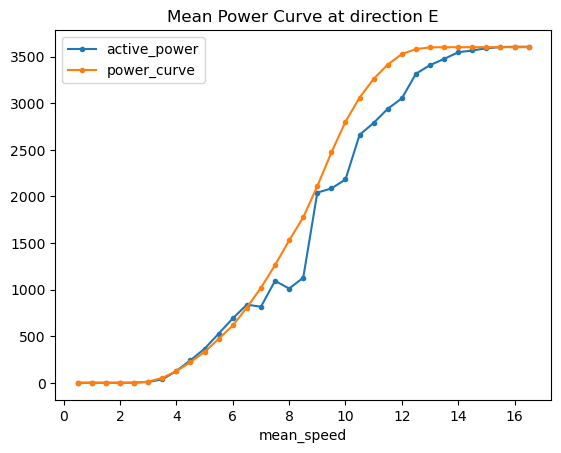

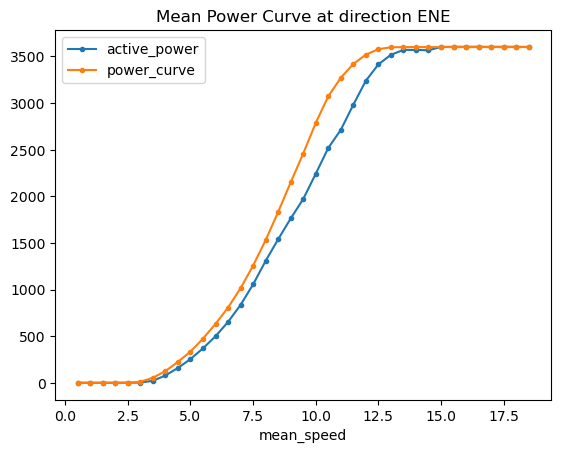

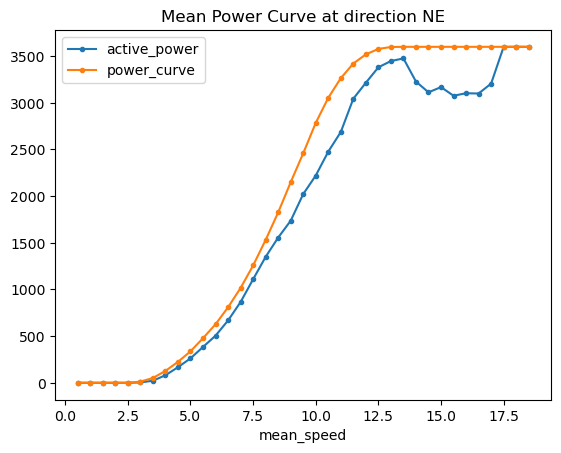

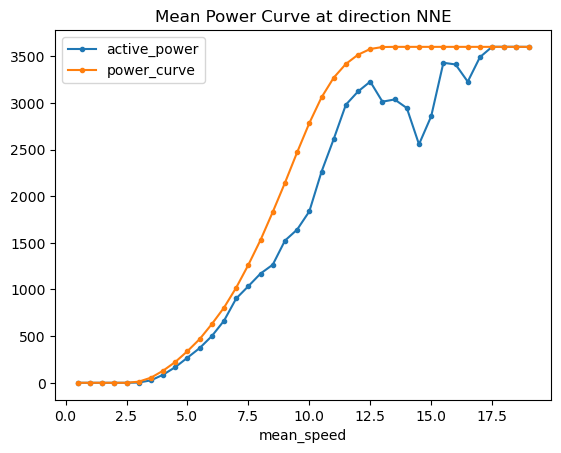

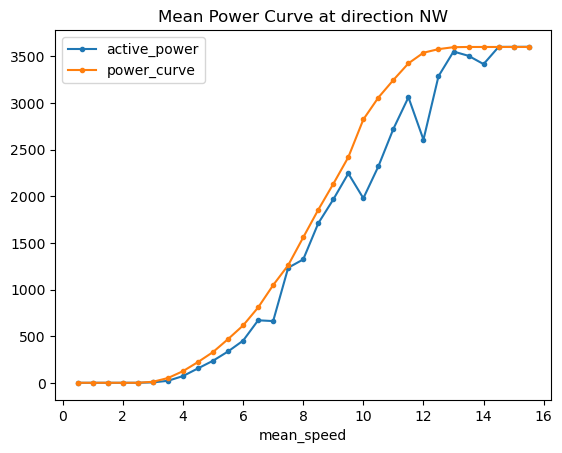

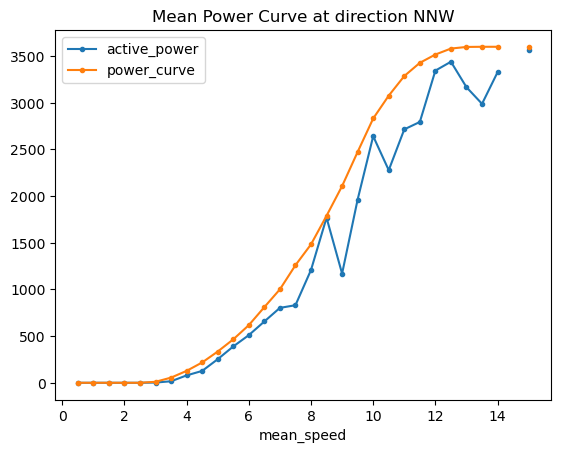

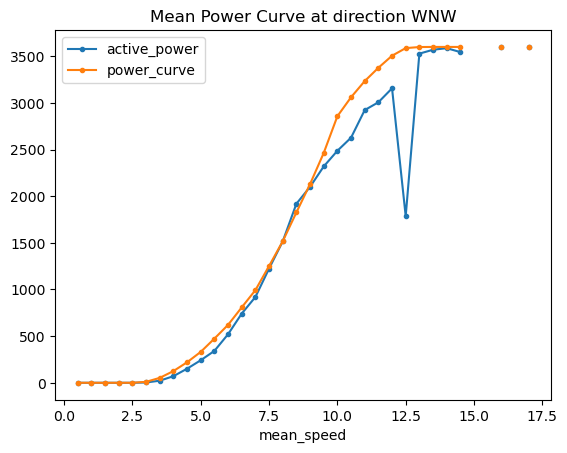

In [25]:
directions=['W', 'WSW', 'SW', 'SSW', 'S', 'SSE', 'SE', 'N', 'ESE', 'E', 'ENE',
       'NE', 'NNE', 'NW', 'NNW', 'WNW']

for i in directions:
  data_d=data[data.direction==i]
  mean_power_curve(data_d)
  plt.title(f'Mean Power Curve at direction {i}')
  plt.show()

<AxesSubplot:xlabel='direction'>

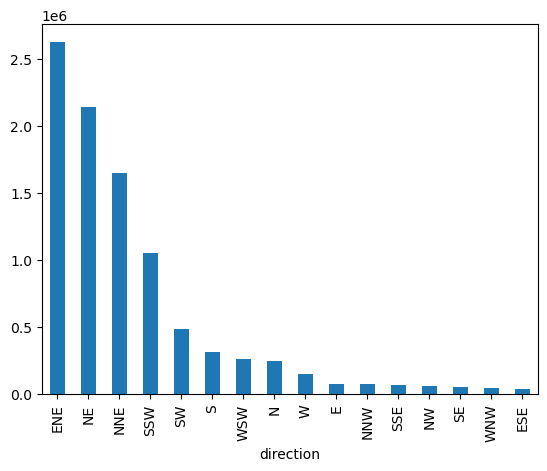

In [26]:
data.groupby('direction').loss.sum().sort_values(ascending=False).plot(kind='bar')

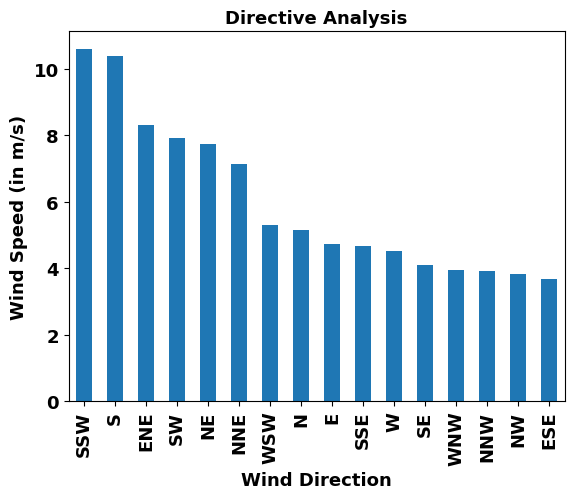

In [27]:
data.groupby('direction').wind_speed.mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Wind Speed (in m/s)',fontsize = 13, fontweight='bold')
plt.xlabel('Wind Direction',fontsize = 13, fontweight='bold')
plt.title('Directive Analysis',fontsize = 13, fontweight='bold')
plt.yticks(fontsize=13, fontweight='bold')
plt.xticks(fontsize=13, fontweight='bold')
plt.show()

# **EDA**

In [28]:
# Removing the negative values of active power from data
data_outlier=data[data.active_power>0]
data_outlier

,active_power,wind_speed,power_curve,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12,433.209835,E
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12,-511.297256,E
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12,-412.822178,E


In [29]:
# No power is produced when the wind speed is less than 3.5 m/s.
data_outlier[(data_outlier.wind_speed<3.5)&(data_outlier.active_power!=0)]

,active_power,wind_speed,power_curve,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 12:30:00,41.947239,3.253968,29.286956,233.065903,12,1,-12.660283,SW
2018-03-01 15:30:00,7.347679,3.011371,16.374212,238.690598,15,3,9.026533,WSW
2018-03-01 15:50:00,12.344200,3.246252,28.731272,238.076508,15,3,16.387072,WSW
2018-05-01 07:30:00,13.934310,3.227394,27.413258,62.523109,7,5,13.478948,ENE
2018-05-01 08:10:00,22.780531,3.310203,33.624574,74.864113,8,5,10.844043,ENE
...,...,...,...,...,...,...,...,...
2018-12-18 01:40:00,6.939387,3.133558,21.700877,49.132389,1,12,14.761490,NE
2018-12-21 05:40:00,20.305180,2.648756,0.000000,175.433197,5,12,-20.305180,S
2018-12-21 05:50:00,4.730608,2.157747,0.000000,172.074402,5,12,-4.730608,S


<AxesSubplot:xlabel='date'>

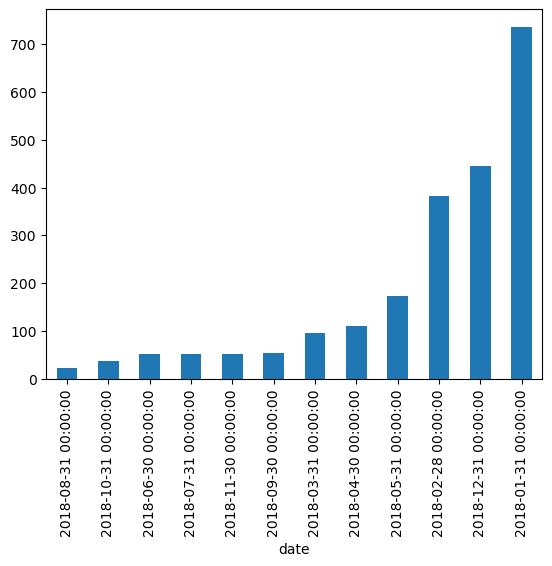

In [30]:

data_zero_power=data[(data.active_power==0)&(data.power_curve!=0)&(data.wind_speed>3.5)]

data_zero_power.resample('M').count().active_power.sort_values(ascending=True).plot(kind='bar')

<AxesSubplot:xlabel='date'>

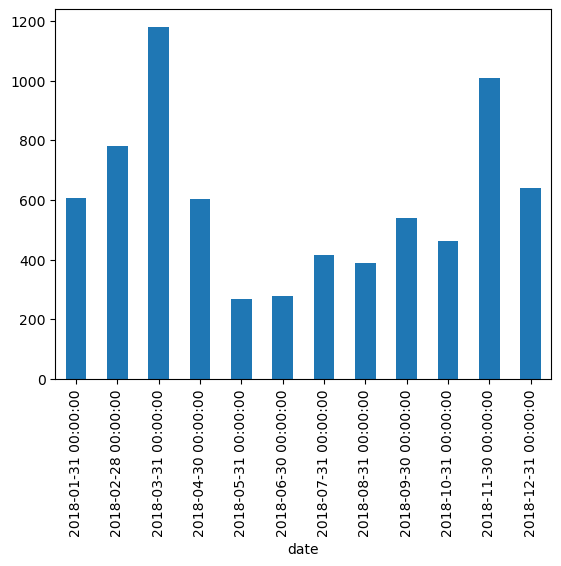

In [31]:
data[(data.active_power>data.power_curve)].resample('M').count().active_power.plot(kind='bar')

In [32]:
data

,active_power,wind_speed,power_curve,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12,433.209835,E
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12,-511.297256,E
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12,-412.822178,E


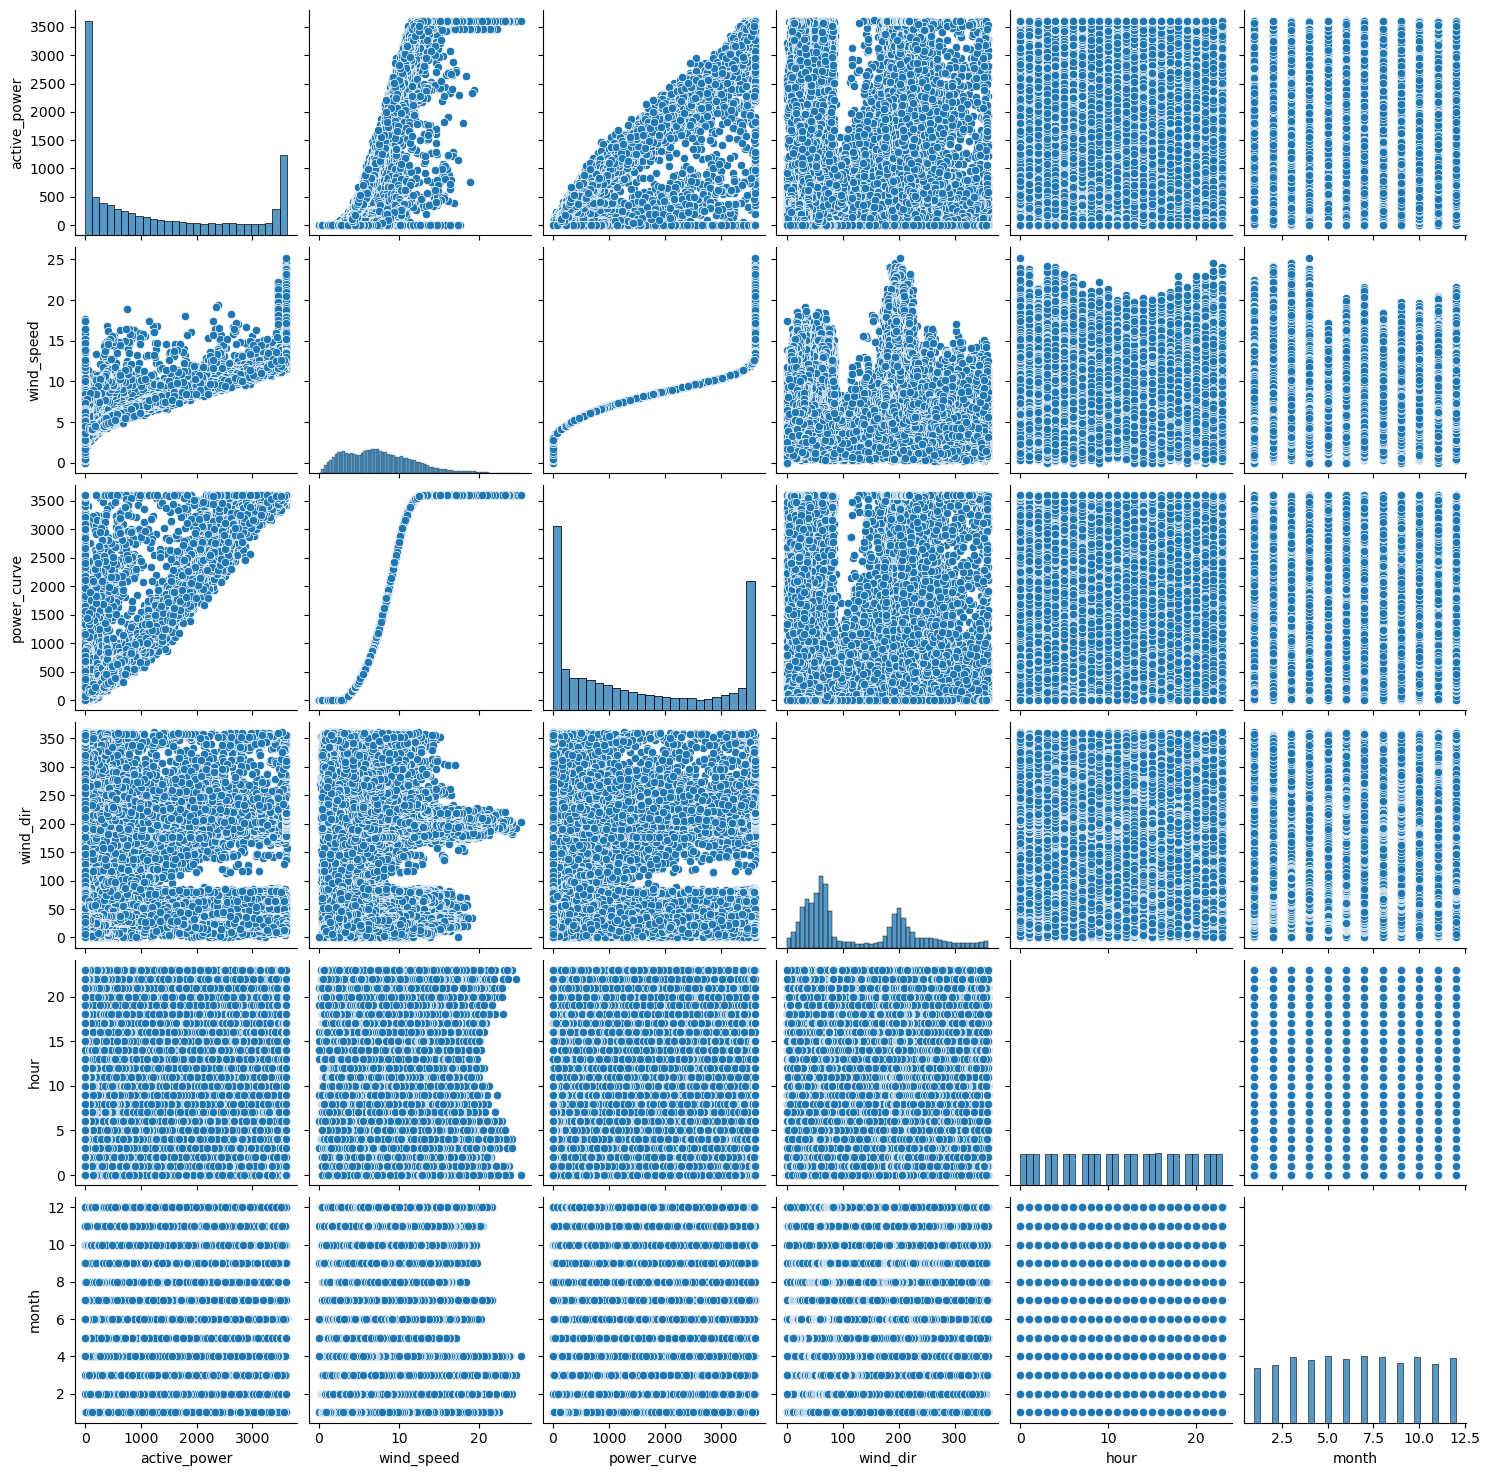

In [33]:

sns.pairplot(data,vars=['active_power',	'wind_speed', 'power_curve',	'wind_dir',	'hour',	'month'])

In [34]:
X=data.drop(columns=['direction','loss'])
X

,active_power,wind_speed,power_curve,wind_dir,hour,month
date,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1
...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(data.drop(columns=['direction','loss','hour','month','active_power']))
X=pd.DataFrame(data=X,columns=data.drop(columns=['direction','loss','hour','month','active_power']).columns)
Y=data['active_power']


## Removing Multicollinearity

In [36]:
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['wind_speed', 'power_curve'], ['power_curve', 'wind_speed']], 2)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

wind_speed     9.242190
power_curve    9.278200
wind_dir       1.012436
dtype: float64

In [38]:
VIF[VIF==VIF.max()].index[0]

'power_curve'

In [39]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [40]:
MC_remover(X)

power_curve has been removed


,wind_speed,wind_dir
0,-0.531476,1.458725
1,-0.446115,1.551254
2,-0.554021,1.593244
3,-0.449071,1.579260
4,-0.468406,1.519504
...,...,...
50525,0.909857,-0.462153
50526,-0.053300,-0.424056
50527,0.207566,-0.416780
50528,0.440823,-0.421537


In [41]:
from sklearn.model_selection import train_test_split as tts, cross_val_score
x_train,x_test,y_train,y_test=tts(X,Y,test_size=0.3,random_state=42)

In [42]:
data

,active_power,wind_speed,power_curve,wind_dir,hour,month,loss,direction
date,,,,,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,0,1,36.281117,W
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,0,1,66.148316,W
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,0,1,84.523429,W
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,0,1,96.481664,W
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,0,1,111.052276,W
...,...,...,...,...,...,...,...,...
2018-12-31 23:10:00,2963.980957,11.404030,3397.190793,80.502724,23,12,433.209835,E
2018-12-31 23:20:00,1684.353027,7.332648,1173.055771,84.062599,23,12,-511.297256,E
2018-12-31 23:30:00,2201.106934,8.435358,1788.284755,84.742500,23,12,-412.822178,E


# **SVM Prediction**

In [43]:
from sklearn.svm import SVR
SVM_regressor=SVR()
#r2_cv=cross_val_score(SVM_regressor, x_train,y_train,cv=5)
#print(r2_cv)

In [44]:
SVM_regressor.fit(x_train,y_train)
train_y_pred=SVM_regressor.predict(x_train)
y_pred=SVM_regressor.predict(x_test)

print(f'Train R2: {SVM_regressor.score(x_train,y_train)}')
print(f'Train R2: {SVM_regressor.score(x_test,y_test)}')

from sklearn.metrics import mean_absolute_error, mean_squared_error

print(f'Test MAE: {mean_absolute_error(y_test,y_pred)}')
print(f'Test MSE: {mean_squared_error(y_test,y_pred)}')

Train R2: 0.9045475265415192
Train R2: 0.9043714238043127
Test MAE: 167.5853048793778
Test MSE: 164570.1264378502


In [45]:
data = pd.DataFrame(list(zip(y_pred, y_test)),
               columns =['Prediction', 'Actual'])

In [46]:
import pandas as pd

# Assuming you have already created the 'data' DataFrame

# Specify the file path where you want to save the CSV file
file_path = 'wind_predictions.csv'

# Use the to_csv method to save the DataFrame to a CSV file
data.to_csv(file_path, index=False)

# 'index=False' is used to prevent writing the index column to the CSV file


Text(0, 0.5, 'Predicted Active Power')

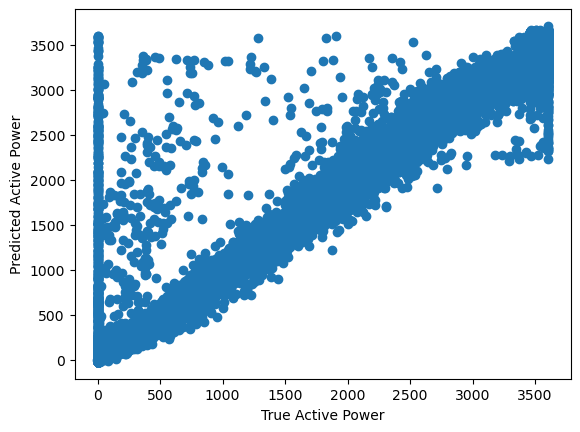

In [47]:
plt.scatter(y_test,y_pred)
plt.xlabel('True Active Power')
plt.ylabel('Predicted Active Power')

In [49]:
import numpy as np
from sklearn.svm import SVR
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the Iris dataset
#iris = load_iris()
#X, y = iris.data, iris.target

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#C=1.0
#epsilon = 0.2
#gamma = 'scale'
#
#svr = SVR(C=C, epsilon=epsilon, gamma=gamma)
#    
#    # Train the SVR model
#svr.fit(x_train, y_train)
#    
#    # Predict on the testing set
#y_pred = svr.predict(x_test)
#    
#    # Calculate the mean squared error as the fitness value
#mse = mean_squared_error(y_test, y_pred)
#
#print(f'Mean Squared Error: {mse}')

a = 0.5

# Define the objective function for SVR optimization
def objective_function(position):
    # Extract the hyperparameters from the position list
    C = 10 ** position[0]
    epsilon = 10 ** position[1]
    gamma = 10 ** position[2]
    
    # Create an SVR model with the hyperparameters
    svr = SVR(C=C, epsilon=epsilon, gamma=gamma)
    
    # Train the SVR model
    svr.fit(x_train, y_train)
    
    # Predict on the testing set
    y_pred = svr.predict(x_test)
    
    # Calculate the mean squared error as the fitness value
    mse = mean_squared_error(y_test, y_pred)
    
    return mse

# Define the bounds for each hyperparameter
bounds = [(-3, 3), (-3, 3), (-3, 3)]  # For C, epsilon, gamma
num_dimensions = len(bounds)

# Define the WOA optimization function
def woa_optimization(objective_function, bounds, max_iter, num_whales):
    # Initialize the population of whales
    low=[b[0] for b in bounds]
    high=[b[1] for b in bounds]
    population = np.random.uniform(low=[b[0] for b in bounds], high=[b[1] for b in bounds], size=(num_whales, len(bounds)))


    # Initialize the best solution and best fitness
    best_solution = None
    best_fitness = float('inf')
    
    # Iterate through each generation
    for iteration in range(max_iter):
        a = 2 - i*(2/max_iter)
        c = 2*np.exp(-4*i/max_iter)
        for i in range(num_whales):
            r1 = np.random.rand()
            r2 = np.random.rand()
            A = 2*a*r1 - a
            C = 2*r2
            b = 1
            l = (-1)**np.random.randint(1,3)
            p = np.random.rand()
            position = population[i]
            # Update the fitness value of the current whale
            current_fitness = objective_function(position)

            # Update the best solution if a better solution is found
            if current_fitness < best_fitness:
                best_solution = position
                best_fitness = current_fitness

            # Update the position of the current whale based on its distance to the best solution
            r1 = np.random.rand(num_dimensions)
            r2 = np.random.rand(num_dimensions)
            A = 2 * a * r1 - a
            C = 2 * r2
            D = np.abs(C * best_solution - position)
            updated_whale_position = np.zeros(num_dimensions)

            for j in range(num_dimensions):
                if C[j] < 1:
                    updated_whale_position[j] = (
                        best_solution[j] - A[j] * D[j]
                    )  # Spiral updating mechanism
                else:
                    if D[j] < 0.5 * (high[j] - low[j]):
                        updated_whale_position[j] = (
                            position[j] + b * D[j]
                        )  # Encircling mechanism
                    else:
                        updated_whale_position[j] = (
                            position[j] - b * D[j]
                        )  # Encircling mechanism

                # Boundary handling
                lower_bound, upper_bound = bounds[j]
                if updated_whale_position[j] < lower_bound:
                    updated_whale_position[j] = lower_bound
                if updated_whale_position[j] > upper_bound:
                    updated_whale_position[j] = upper_bound

        # Update the position of the current whale
        position = updated_whale_position

    return best_solution, best_fitness

# Set the parameters for WOA optimization
max_iter = 100  # Number of iterations for WOA
num_whales = 10  # Number of whales in the population

# Call the WOA optimization function
best_solution, best_fitness = woa_optimization(objective_function, bounds, max_iter, num_whales)

# Extract the hyperparameters from the best solution
C = 10 ** best_solution[0]
epsilon = 10 ** best_solution[1]
gamma = 10 ** best_solution[2]

svr = SVR(C=C, epsilon=epsilon, gamma=gamma)
    
# Train the SVR model
svr.fit(x_train, y_train)
    
# Predict on the testing set
y_pred = svr.predict(x_test)
    
# Calculate the mean squared error as the fitness value
mse = mean_squared_error(y_test, y_pred)

print(f'Optimized hyperparameters (C, eplisom, gamma): {best_solution}')
print(f'Optimized Mean Squared Error: {mse}')

NameError: name 'b' is not defined